In [111]:
import pandas as pd
import numpy as np

In [112]:
import matplotlib.pyplot as plt

In [113]:
df_fr=pd.read_csv("Arya_DataScientist_Assignment/training_set.csv")

In [114]:
df_fr=df_fr.drop(['Unnamed: 0'],axis=1)

In [115]:
df_fr.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [116]:
df_fr.columns[:-1],

(Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
        'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
        'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
        'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
        'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
        'X52', 'X53', 'X54', 'X55', 'X56', 'X57'],
       dtype='object'),)

In [117]:
import seaborn as sns

From the the below bar plot it can be seen that the data is slighlty unbalance 

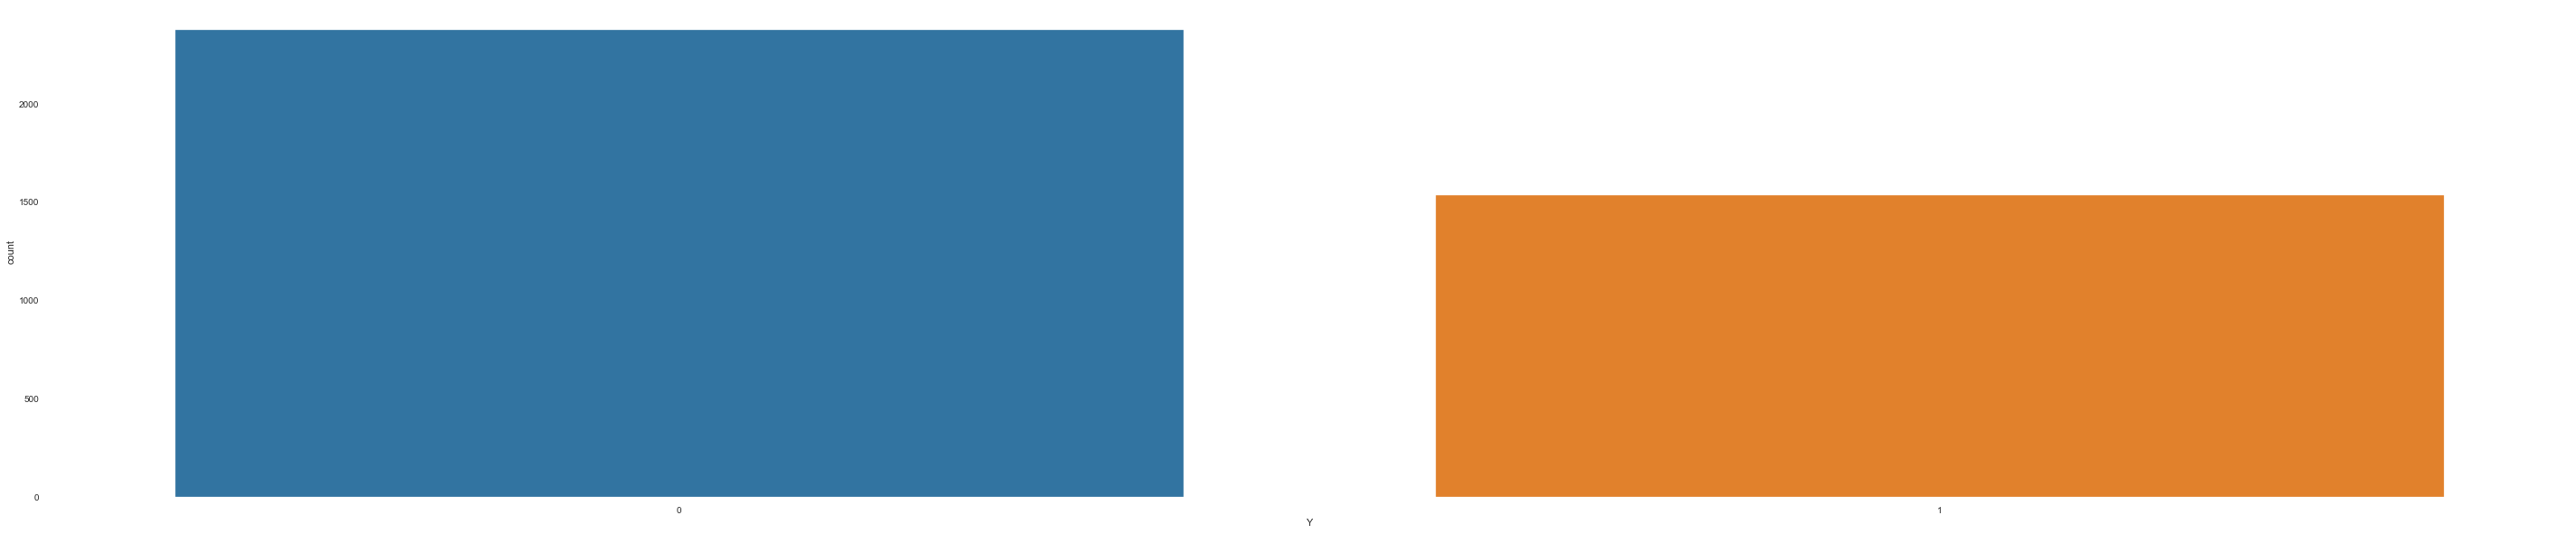

In [241]:
sns.countplot(df_fr['Y'])

In [242]:
corr=(df_fr.drop(['Y'],axis=1)).corr()

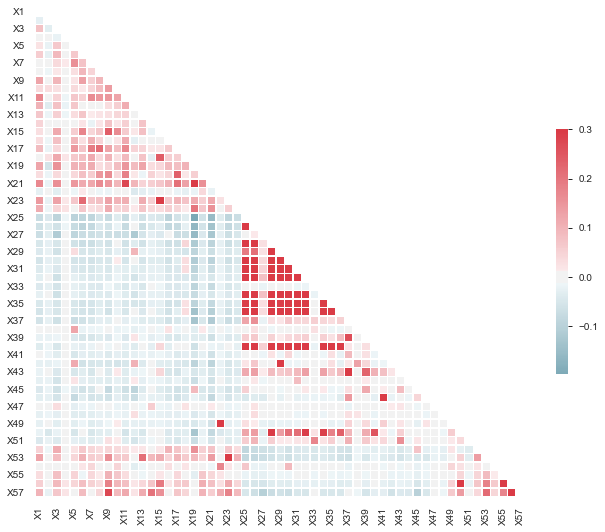

In [121]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap it was cleary absorved the there is high correlation between feature with bright red which include X27 and X32,X27 and X36 ,X31 and X40

In [16]:
comp=df_fr.copy()

In [245]:
def correlation(dataset, uthreshold,lthreshold):
    col_corr = set() # Set of all the names of deleted columns
    
    for i in range(len(corr.columns)):
        for j in range(i):
            if (corr.iloc[i, j] >= uthreshold) and (corr.columns[j] not in col_corr) and (corr.iloc[i, j] <= lthreshold):
                colname = corr.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [246]:
filter_col=correlation(comp,0.65,-0.65)

Not that we are not considering label for correlation in the below step we are removing the highly correlated feature we set +0.65  and -0.65 as threshold to remove the feature whose cofficient is in the given range. The high correlation among the features may cause the problem of multicollinearity.

Below are the feature after removal of high correlated features

In [249]:
len(filter_col.columns)

54

Since we have 54 features we it will very different two visulize so we are applying PCA to ease this task prior two apply standard scalar we are using standardization function 

In [248]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(filter_col.drop(['Y'],axis=1)) 

We are considering 2 component of PCA for this task 

In [251]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])


In [252]:
principalDf['Label']=filter_col['Y']

In [253]:
principalDf.head()

,PCA1,PCA2,Label
0,-0.706979,-0.381673,0
1,-1.697252,0.512088,1
2,-0.239041,-1.473885,0
3,-1.899001,0.596529,1
4,-1.809339,0.580105,1


In [254]:
import matplotlib.pyplot as plt

label = principalDf['Label']  # x values
pca1 = principalDf['PCA1']  # left y axis
pca2 = principalDf['PCA2']   # right y axis
#pca3 = principalDf['PCA3']

#plt.show()

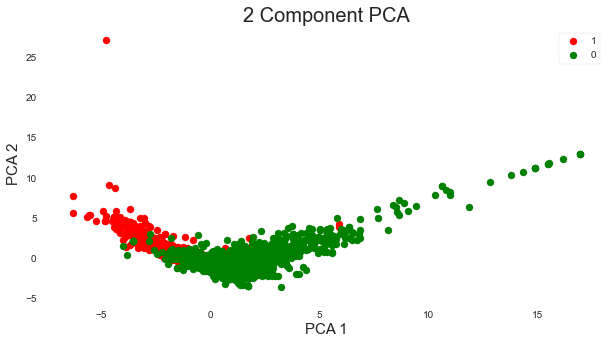

In [255]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)

ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['r','g']

for target, color in zip(targets,colors):
    indicesToKeep = label == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PCA1']
               , principalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

Now we can see that the data that the data is linearly seprable from each other in 2D Plane

In [134]:
from pandas_profiling import ProfileReport

In [135]:
profile = ProfileReport(df_fr, title="EDA Profiling Report")

In [ ]:
profile.to_notebook_iframe()

In [192]:
profile.to_file("output.html")

In [136]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [137]:
Y=filter_col['Y']
X=filter_col.drop(['Y'],axis=1)

In [164]:
from sklearn.ensemble import ExtraTreesClassifier

Now for extratreeClassifier  we use to remove the unused features

In [165]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [177]:
features_weight=model.feature_importances_

In [181]:
dic_feacture={i:j for i,j in zip(filter_col.columns,features_weight) if j>0.009 }

In [ ]:
dic_feacture

In [176]:
co=model.feature_importances_[i for i in model.feature_importances_ ]

SyntaxError: invalid syntax (<ipython-input-176-f3953cea5466>, line 1)

In [166]:
print(model.feature_importances_)

[0.01124525 0.00602661 0.01149676 0.00237743 0.01970783 0.01539278
 0.06394156 0.01667947 0.02619677 0.00976686 0.02731714 0.01402813
 0.00860921 0.00380279 0.00715683 0.04614943 0.02184682 0.02132018
 0.05371534 0.02817598 0.05378301 0.00404677 0.02484337 0.0210622
 0.03408923 0.03321121 0.02542596 0.00941949 0.00403662 0.00569805
 0.00626581 0.00561194 0.00774675 0.01685917 0.00103094 0.00508721
 0.00416675 0.01127997 0.00326023 0.0053407  0.02068845 0.01286488
 0.00107442 0.00342196 0.00686055 0.01563035 0.00531223 0.04555271
 0.0760482  0.00624325 0.04387578 0.0368581  0.02835055]


In [191]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X[list(dic_feacture.keys())], Y,test_size=test_size)

In [192]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predictions=clf.predict(X_test)

C:\Users\91914\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [193]:
clf.score(X_test,y_test)

0.9120654396728016

In [194]:
from sklearn import svm

In [145]:
#lin_clf = svm.LinearSVC()

In [195]:
clf = svm.SVC()

In [196]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [197]:
clf.score(X_test,y_test)

0.7096114519427403

In [198]:
3
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [199]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [200]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.07%
Accuracy: 94.07%


In [201]:
from sklearn.metrics import confusion_matrix

In [202]:
from sklearn.metrics import plot_confusion_matrix

In [203]:
class_names=['1','0']

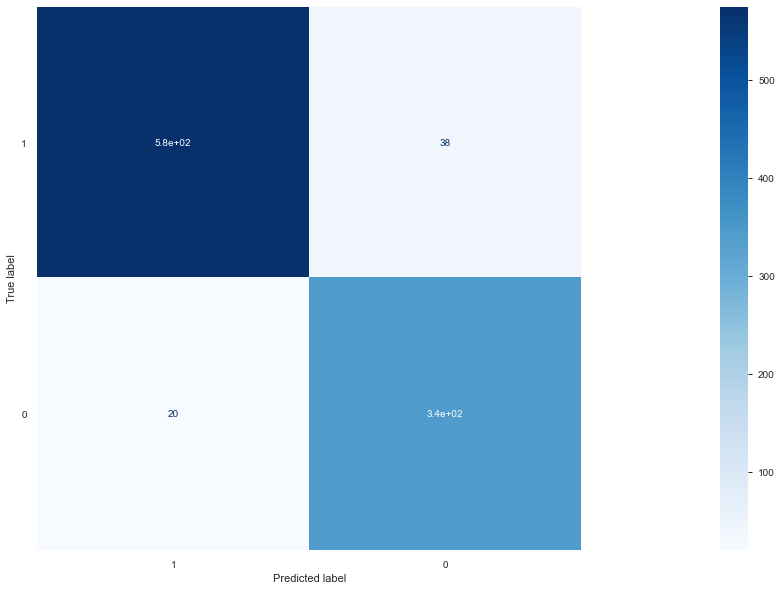

In [204]:
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [205]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [206]:
from sklearn.metrics import f1_score

In [207]:
from sklearn import metrics

In [208]:
f1_score(y_test, predictions, average='macro')

0.9372233240075079

In [209]:
import matplotlib.pyplot as plt

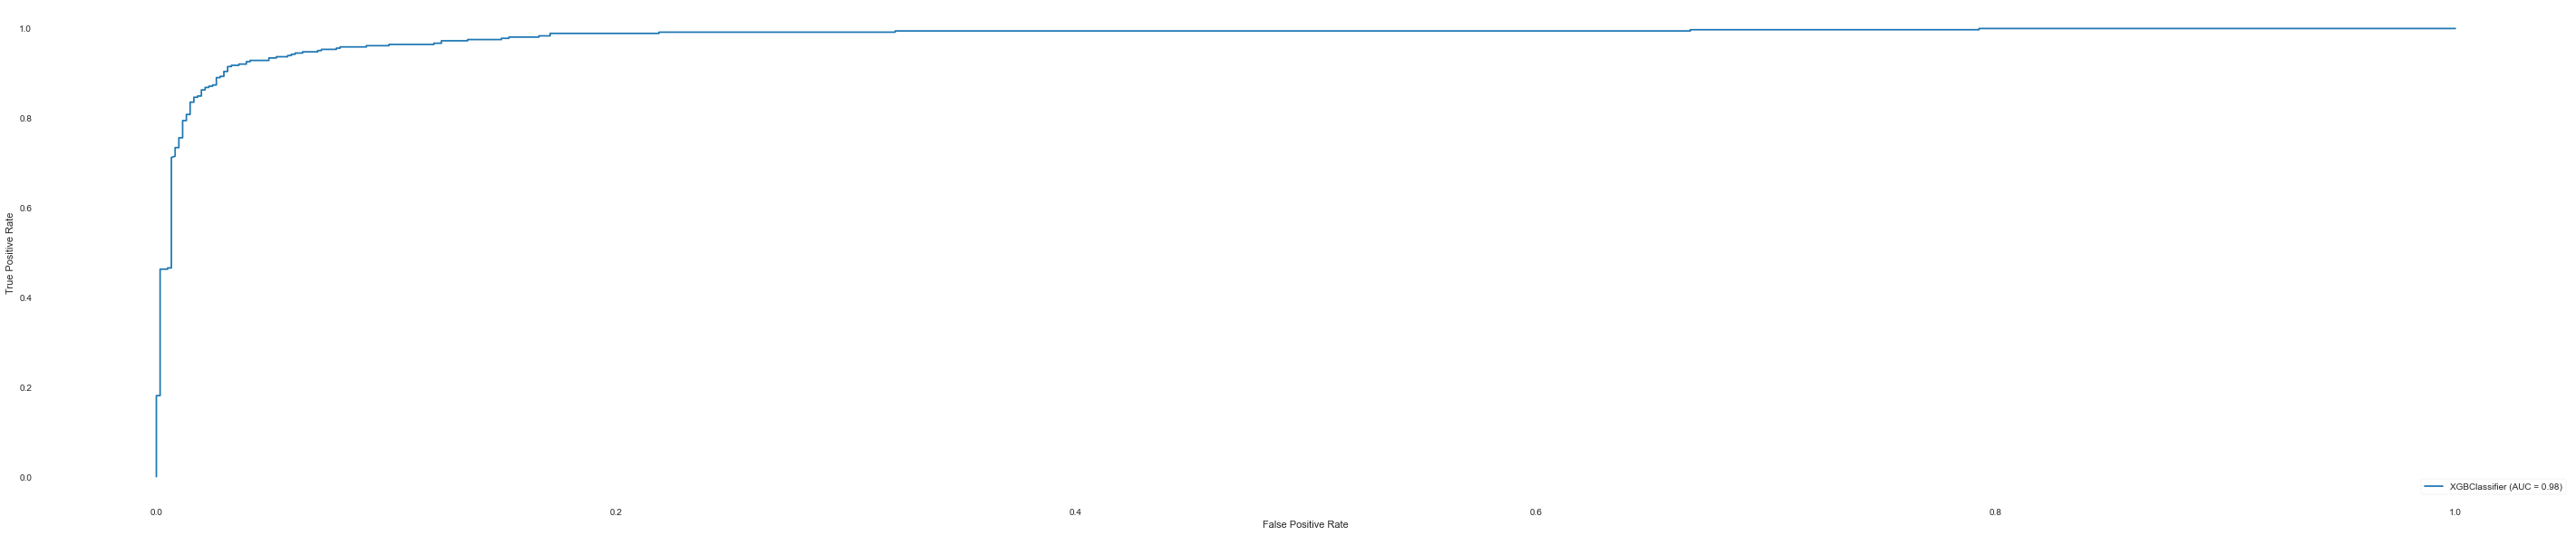

In [210]:
metrics.plot_roc_curve(model, X_test, y_test)

In [211]:
[predictions==y_test]

[2161     True
 2351     True
 3450     True
 1470     True
 747      True
         ...  
 2282     True
 3741     True
 1577    False
 3417     True
 1589     True
 Name: Y, Length: 978, dtype: bool]

Where XG Boast is not performing well ?

In [212]:
correct=X_test.loc[predictions==y_test]

In [213]:
correct

,X1,X3,X5,X6,X7,X8,X9,X10,X11,X12,...,X37,X42,X45,X46,X50,X52,X53,X55,X56,X57
2161,0.00,0.74,1.85,0.37,0.37,0.00,0.00,0.74,0.00,0.37,...,0.00,0.0,0.00,0.0,0.264,0.000,0.000,2.492,12,172
2351,0.00,0.98,0.00,0.00,0.49,0.00,0.00,0.98,0.00,0.98,...,0.00,0.0,0.49,0.0,0.000,0.862,0.000,12.148,272,571
3450,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,...,0.00,0.0,0.00,0.0,0.000,0.000,0.000,5.888,29,53
1470,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.000,0.000,0.000,1.000,1,3
747,0.00,0.36,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,...,0.00,0.0,0.00,0.0,0.236,0.000,0.000,1.277,3,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.57,...,1.78,0.0,0.00,0.0,0.000,0.000,0.000,1.720,11,43
2282,0.00,0.00,0.00,0.00,2.30,0.00,0.00,0.00,0.76,2.30,...,0.00,0.0,0.00,0.0,0.000,0.518,0.000,11.312,142,181
3741,0.26,0.85,0.00,0.19,0.06,0.33,0.72,0.46,0.72,0.79,...,0.00,0.0,0.06,0.0,0.131,0.101,0.101,4.398,79,1280
3417,0.11,0.22,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.55,...,0.00,0.0,0.22,0.0,0.156,0.017,0.000,3.061,38,600


In [214]:
incorrect=X_test.loc[predictions!=y_test]

In [215]:
import xgboost as xgb

In [216]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [217]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [218]:
cv_results = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [219]:
import matplotlib.pyplot as plt

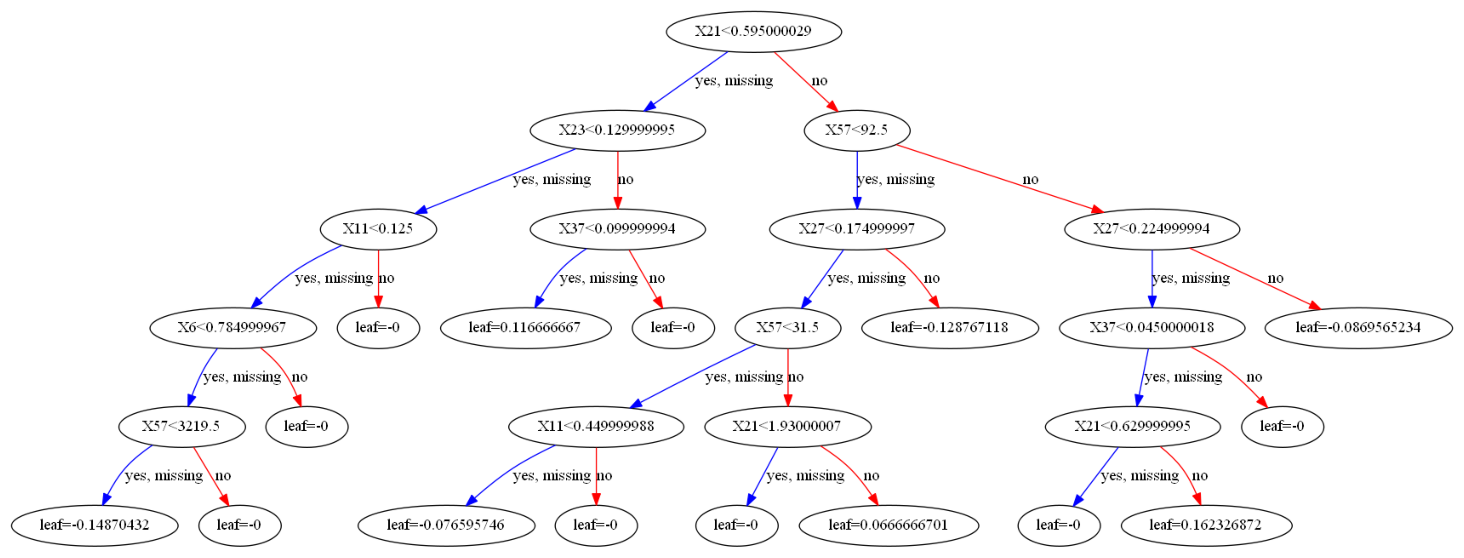

In [220]:
xgb.plot_tree(cv_results,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [221]:
from sklearn.naive_bayes import GaussianNB

In [222]:
clf = GaussianNB()

In [223]:
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [224]:
y_test

2161    1
2351    1
3450    0
1470    0
747     0
       ..
2282    1
3741    1
1577    0
3417    0
1589    0
Name: Y, Length: 978, dtype: int64

In [225]:
pred=clf.predict(X_test)

In [226]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 90.29%


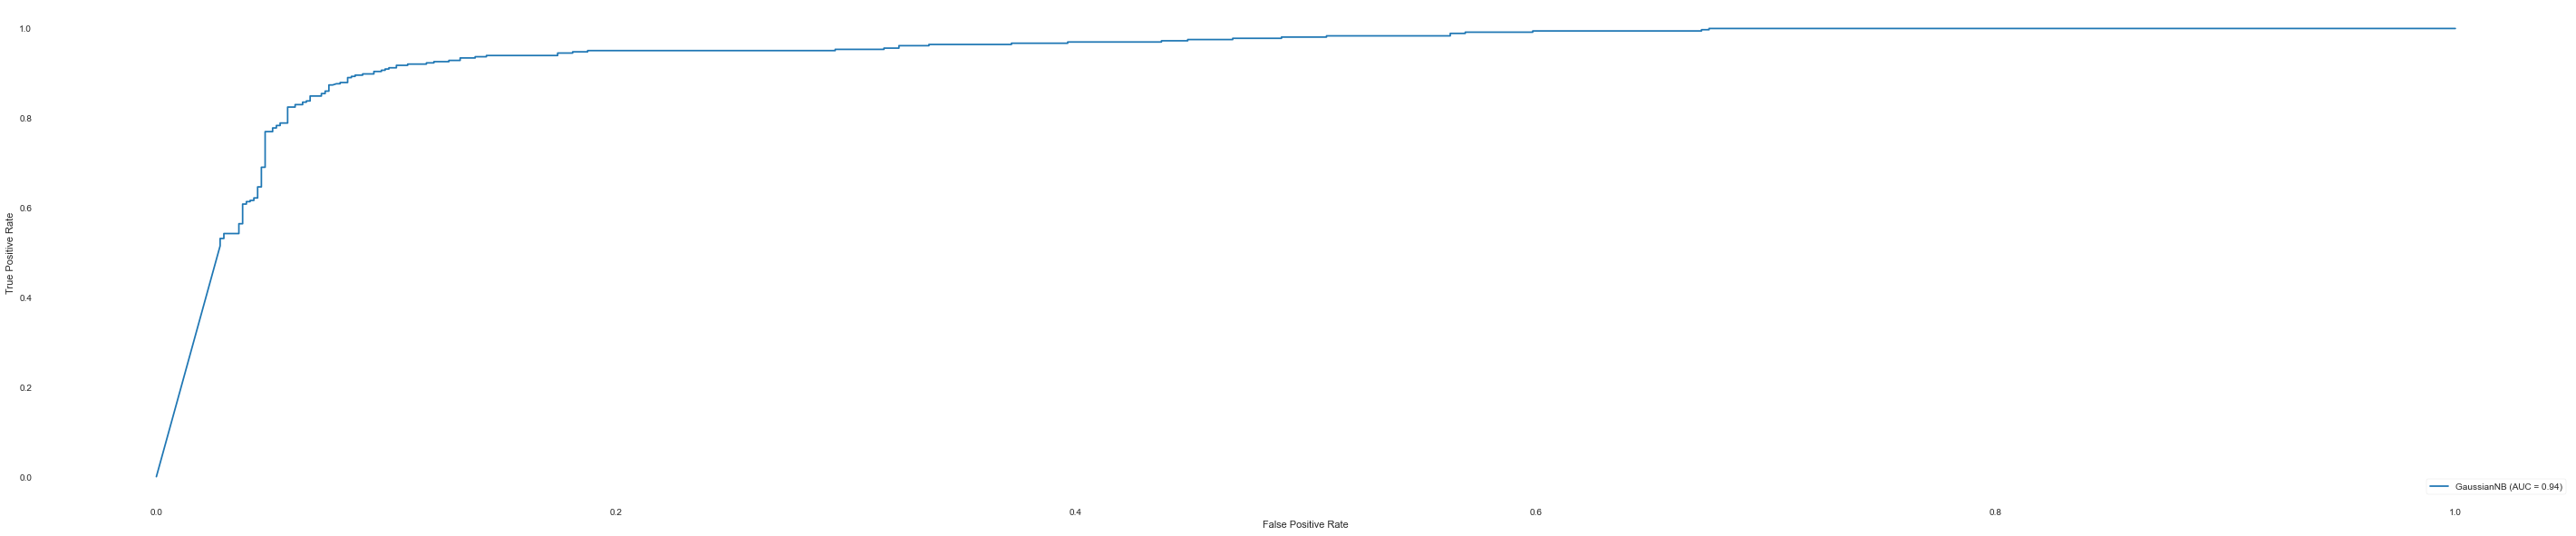

In [227]:
metrics.plot_roc_curve(clf, X_test, y_test)

In [228]:
from sklearn.naive_bayes import MultinomialNB

In [229]:
clf=MultinomialNB()

In [230]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [231]:
pred=clf.predict(X_test)

In [232]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 74.54%


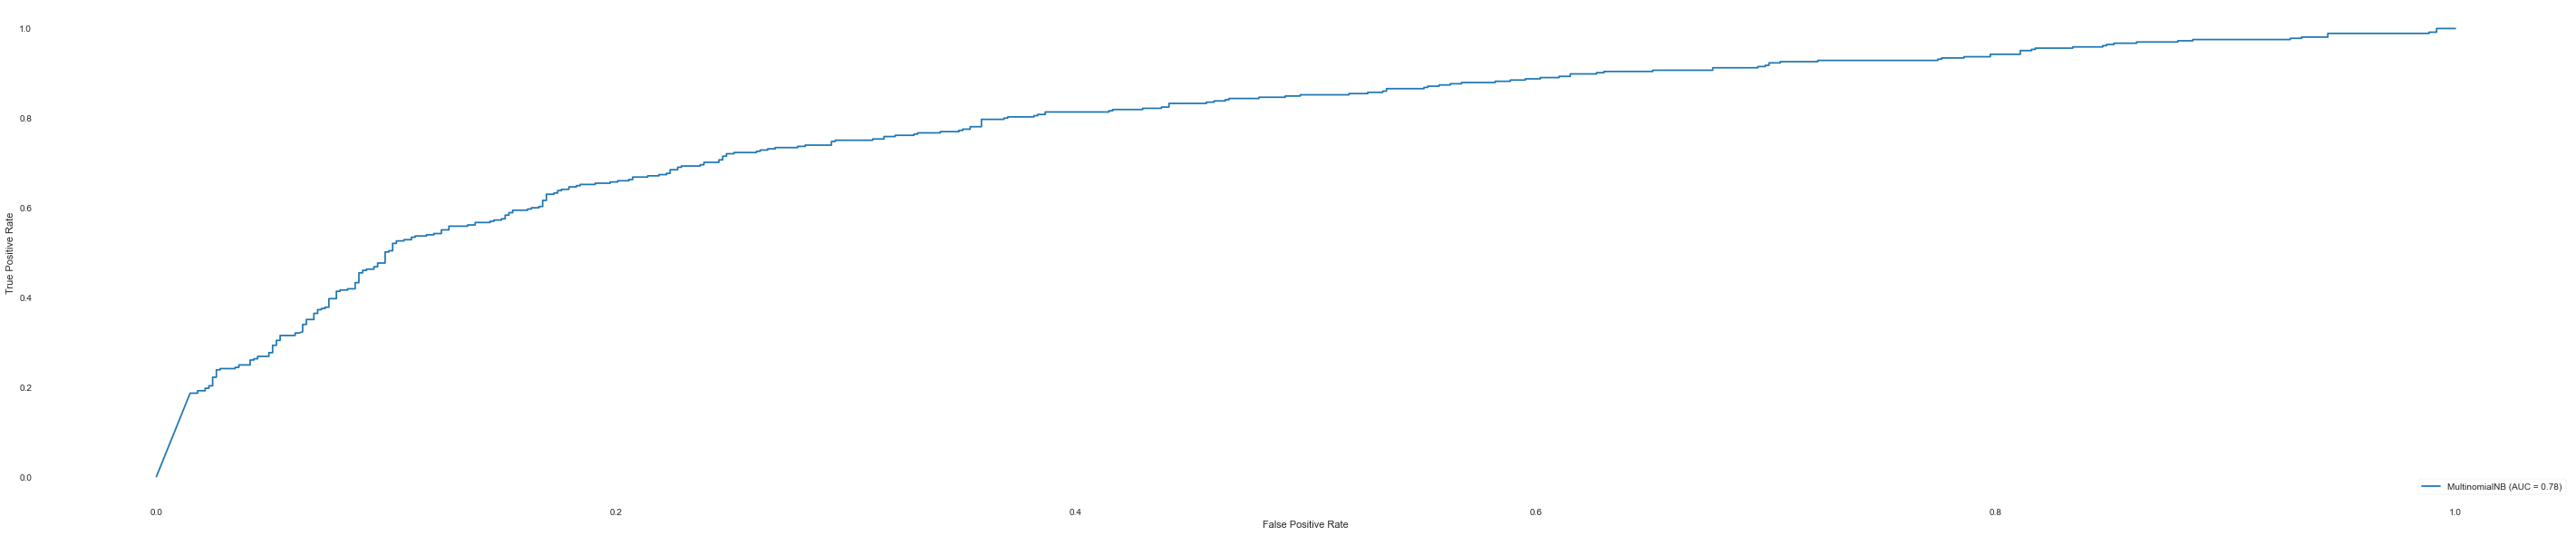

In [233]:
metrics.plot_roc_curve(clf, X_test, y_test)

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
clf = RandomForestClassifier(max_depth=8, random_state=0)

In [236]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [237]:
pred=clf.predict(X_test)

In [238]:
from sklearn import datasets, metrics, model_selection, svm

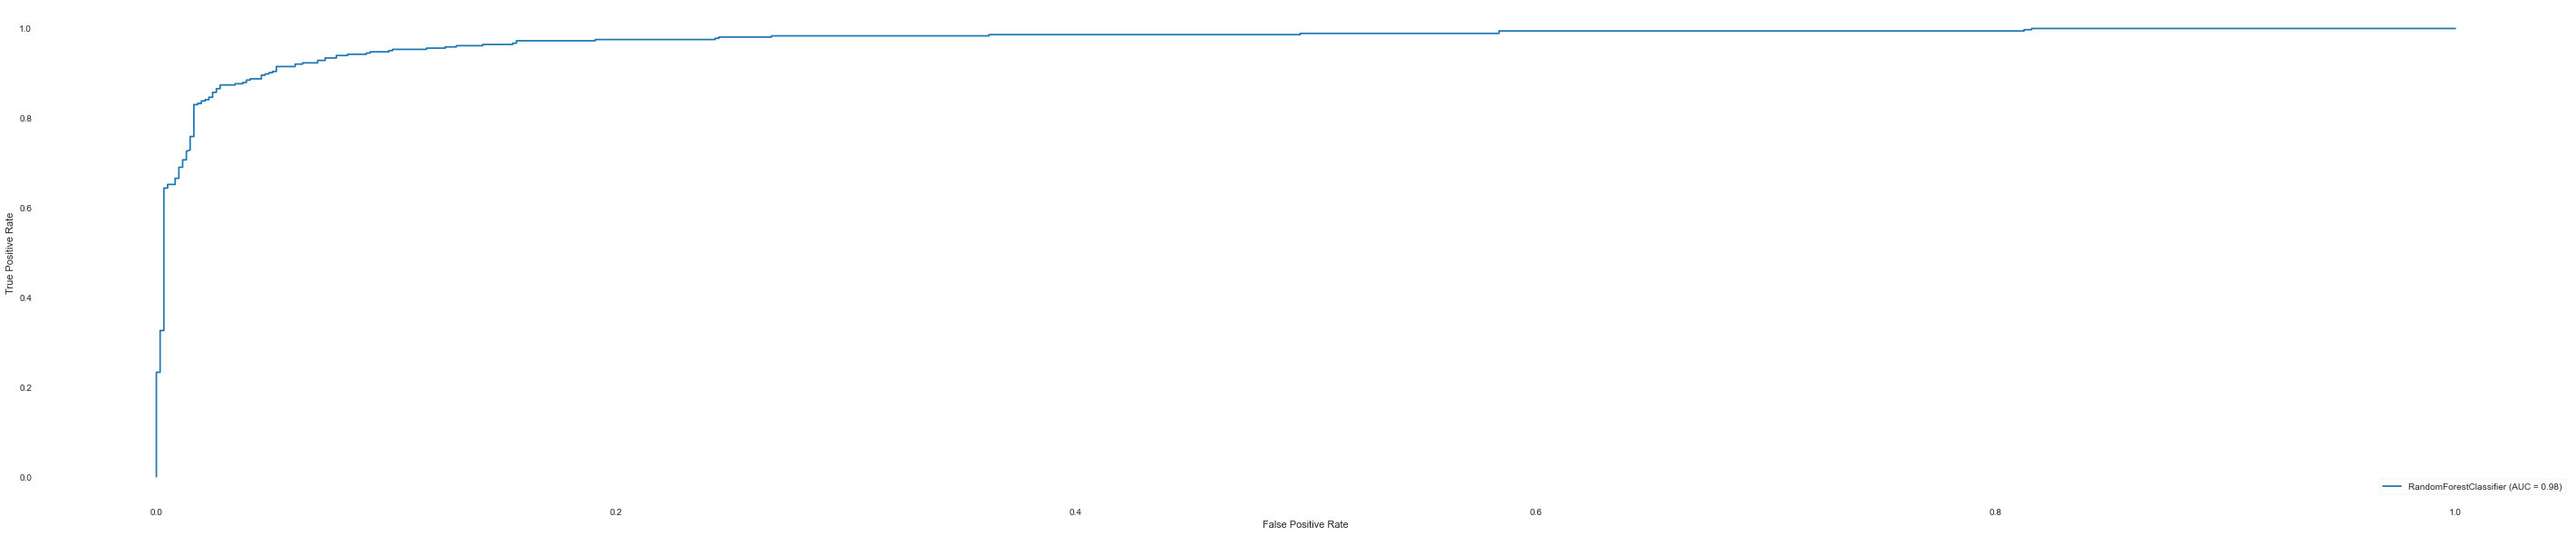

In [239]:
metrics.plot_roc_curve(clf, X_test, y_test) 

In [240]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 93.25%
